In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

In [22]:
# Set example dataset
x = np.c_[[4, 20, 3, 19, 17, 8, 19, 18, 12.5],
         [15, 13, 13, 4, 17, 11, 12, 6, 9]]
x_df = pd.DataFrame(x, columns=['experience', 'violation'])
x_df

,experience,violation
0,4.0,15.0
1,20.0,13.0
2,3.0,13.0
3,19.0,4.0
4,17.0,17.0
5,8.0,11.0
6,19.0,12.0
7,18.0,6.0
8,12.5,9.0


In [23]:
x_df.iloc[:, 1].mean()

11.11111111111111

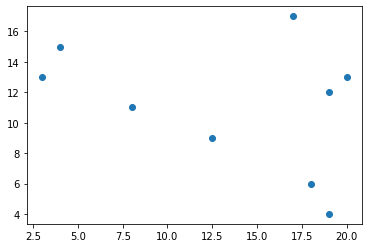

In [24]:
# plot example dataset
plt.figure()
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [25]:
?GaussianMixture

In [26]:
# implement Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, 
                     covariance_type='full', random_state = 10) #0 과 10
gmm.fit(x)

GaussianMixture(n_components=3, random_state=10)

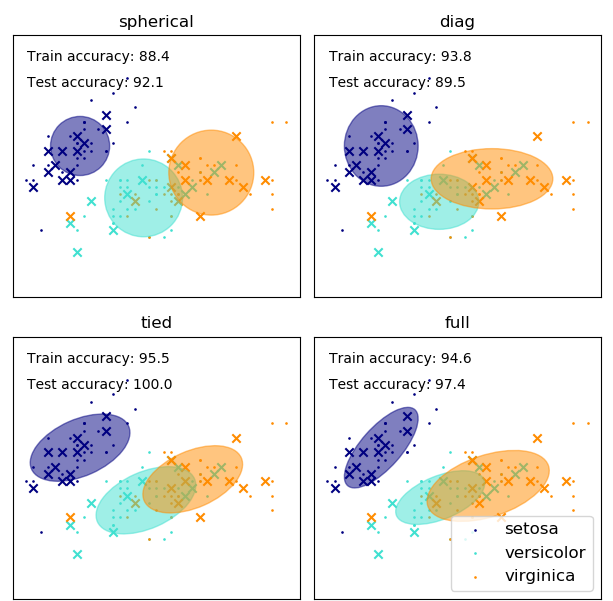

In [27]:
# clustering results (hard assignment)
labels = gmm.predict(x)
print(labels)

[0 2 0 1 2 0 2 1 0]


In [28]:
# clusterig result (soft assignment)
proba = gmm.predict_proba(x)
proba = proba.round(3)
proba_df = pd.DataFrame(proba, 
                       columns=['label_0', 'label_1', 'label_2'])

proba_df

,label_0,label_1,label_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0


In [34]:
gmm.means_

array([[ 6.87504131, 11.99997708],
       [18.50000279,  4.99999441],
       [18.66666667, 14.        ]])

In [11]:
# result statistics
n_instances, n_features = x.shape

# 사전 확률
pi = gmm.weights_
pi_around = np.around(pi, decimals=3)
print('=== pi ===')
print('pi_0:', pi_around[0])
print('pi_1:', pi_around[1])
print('pi_2:', pi_around[2])

# 전체 데이터에서 해당 군집에 포함되는 객체의 개수 (by 사전 확률)
n = pi * n_instances
print('=== N ===')
print('N0:', n[0])
print('N1:', n[1])
print('N2:', n[2])
print('n의 합:', sum(n))

# 해당 군집의 관측값들의 평균 -> 각 군집에 속할 활률이 1이 아니면 의미가 달라짐
# mu = gmm.means_
mu_0 = np.average(x, axis=0, weights=proba[:, 0])
mu_1 = np.average(x, axis=0, weights=proba[:, 1])
mu_2 = np.average(x, axis=0, weights=proba[:, 2])
print('=== mu ===')
print('mu_0:', mu_0)
print('mu_1:', mu_1)
print('mu_2:', mu_2)

# 각 군집에 대한 공분산 행렬
sigma = gmm.covariances_
print('=== sigma ===')
print('sigma_0:')
print(sigma[0])
print('sigma_1:')
print(sigma[1])
print('sigma_2:')
print(sigma[2])

=== pi ===
pi_0: 0.444
pi_1: 0.222
pi_2: 0.333
=== N ===
N0: 4.0000146949020685
N1: 1.999985305098025
N2: 2.9999999999999134
n의 합: 9.000000000000007
=== mu ===
mu_0: [ 6.875 12.   ]
mu_1: [18.5  5. ]
mu_2: [18.66666667 14.        ]
=== sigma ===
sigma_0:
[[14.0472893  -7.62523052]
 [-7.62523052  5.0001272 ]]
sigma_1:
[[ 0.250001 -0.5     ]
 [-0.5       1.000001]]
sigma_2:
[[ 1.55555656 -2.33333333]
 [-2.33333333  4.66666767]]


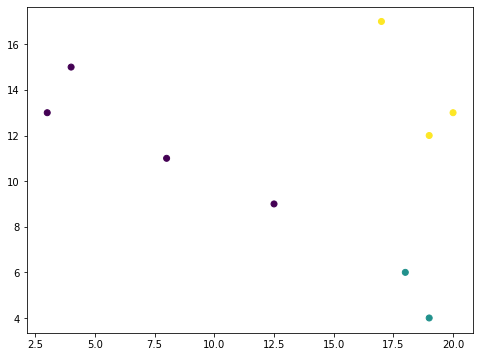

In [12]:
labels = gmm.predict(x)

plt.figure(figsize = (8, 6))
plt.scatter(x[:, 0], x[:, 1] ,c = labels)
plt.show()

## [실습]

### Gausian mixture 모델의 covariance type을 다른 방법으로도 진행

* covariance_type: spherical, diag, tied, full


* covariance type에 따라 covariance가 어떻게 변하는지 확인


* 클러스터링 결과가 어떻게 바뀌는지 확인

==================spherical==================

=== pi ===
pi_0: 0.333
pi_1: 0.326
pi_2: 0.341
=== N ===
N0: 2.9981742088719296
N1: 2.9360584883571073
N2: 3.0657673027709698
n의 합: 9.000000000000007
=== mu ===
mu_0: [ 6.875 12.   ]
mu_1: [18.5  5. ]
mu_2: [18.66666667 14.        ]
=== sigma ===
sigma: [3.67029969 3.14080949 6.52782412]
sigma_0:
3.6702996925529066
sigma_1:
3.1408094893896417
sigma_2:
6.52782412250126


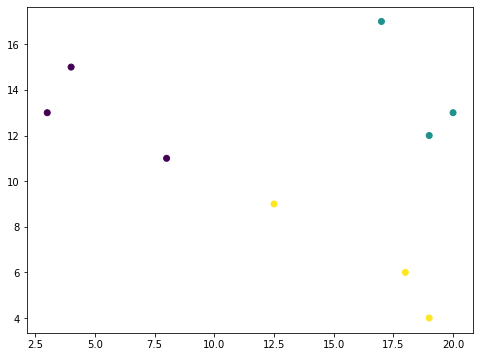

==================diag==================

=== pi ===
pi_0: 0.446
pi_1: 0.332
pi_2: 0.222
=== N ===
N0: 4.012754933055566
N1: 2.9880881827492334
N2: 1.999156884195206
n의 합: 9.000000000000007
=== mu ===
mu_0: [ 6.875 12.   ]
mu_1: [18.5  5. ]
mu_2: [18.66666667 14.        ]
=== sigma ===
sigma: [[14.40714857  5.02653111]
 [ 1.55452458  4.6749225 ]
 [ 0.25000096  1.00000084]]
sigma_0:
[14.40714857  5.02653111]
sigma_1:
[1.55452458 4.6749225 ]
sigma_2:
[0.25000096 1.00000084]


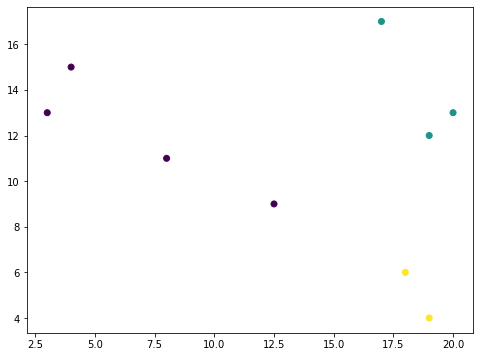

==================tied==================

=== pi ===
pi_0: 0.334
pi_1: 0.333
pi_2: 0.333
=== N ===
N0: 3.005660501759235
N1: 2.9943394983987783
N2: 2.9999999998419944
n의 합: 9.000000000000007
=== mu ===
mu_0: [ 6.875 12.   ]
mu_1: [18.5  5. ]
mu_2: [18.66666667 14.        ]
=== sigma ===
sigma: [[ 4.82706267 -3.57050262]
 [-3.57050262  3.85884328]]
sigma_0:
[ 4.82706267 -3.57050262]
sigma_1:
[-3.57050262  3.85884328]


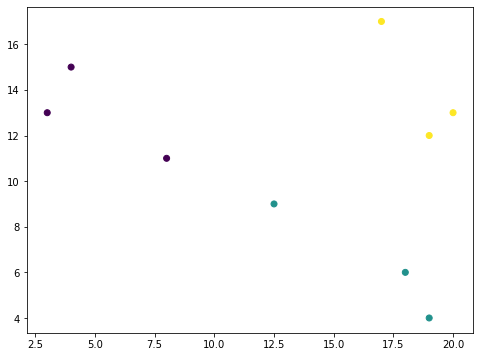

==================full==================

=== pi ===
pi_0: 0.333
pi_1: 0.333
pi_2: 0.333
=== N ===
N0: 2.999706144545682
N1: 3.000293855454321
N2: 3.0000000000000044
n의 합: 9.000000000000007
=== mu ===
mu_0: [ 6.875 12.   ]
mu_1: [18.5  5. ]
mu_2: [18.66666667 14.        ]
=== sigma ===
sigma: [[[ 8.25493388 -5.71474855]
  [-5.71474855  4.24846328]]

 [[ 4.73989197 -2.70396561]
  [-2.70396561  2.68507461]]

 [[ 1.55555656 -2.33333333]
  [-2.33333333  4.66666767]]]
sigma_0:
[[ 8.25493388 -5.71474855]
 [-5.71474855  4.24846328]]
sigma_1:
[[ 4.73989197 -2.70396561]
 [-2.70396561  2.68507461]]
sigma_2:
[[ 1.55555656 -2.33333333]
 [-2.33333333  4.66666767]]


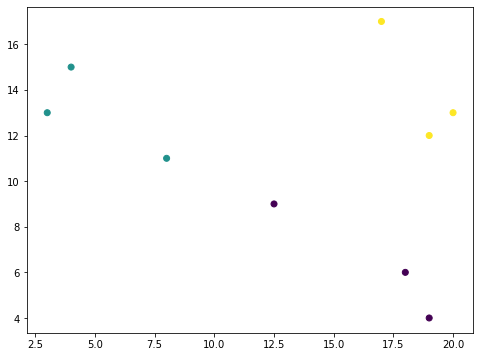

In [31]:
# implement Gaussian Mixture Model (GMM)

def gaussianMixture_print(covariance_type, n_components):
    gmm = GaussianMixture(n_components=n_components, 
                        covariance_type=covariance_type)
    gmm.fit(x)
    
    
    # result statistics
    n_instances, n_features = x.shape

    pi = gmm.weights_
    pi_around = np.around(pi, decimals=3)
    print('=== pi ===')
    for idx in range(n_components):
        print(f'pi_{idx}: {pi_around[idx]}')

    n = pi * n_instances
    print('=== N ===')
    for idx in range(n_components):
        print(f'N{idx}: {n[idx]}')
    print('n의 합:', sum(n))
    
    print('=== mu ===')
    for idx in range(n_components):
        print(f'mu_{idx}: {np.average(x, axis=0, weights=proba[:, idx])}')

    sigma = gmm.covariances_
    print('=== sigma ===')
    print(f'sigma: {sigma}')
    for idx in range(len(sigma)):
        print(f'sigma_{idx}:')
        print(sigma[idx])
    
    labels = gmm.predict(x)
    
    plt.figure(figsize = (8, 6))
    plt.scatter(x[:, 0], x[:, 1] ,c = labels)
    plt.show()

for covariance_type in ("spherical", 'diag', 'tied', 'full'):
    print(f'=================={covariance_type}==================')
    print()
    gaussianMixture_print(covariance_type, 3)

_ _ _

## Iris data set

In [12]:
df = pd.read_csv('./Dataset/Iris.csv')
# load datasets (Iris)

In [13]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [14]:
X = df.iloc[:, 1:-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
# divide independent variables and label

![bic](그림/BIC.png)

In [15]:
n_components_range = range(2, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']

bic_save = np.zeros(shape=(len(cv_types), len(n_components_range)))

for idx_cv, cv_type in enumerate(cv_types):
    for idx_n_comp, n_components in enumerate(n_components_range):
        gmm = GaussianMixture(n_components=n_components, 
                             covariance_type=cv_type)
        gmm.fit(X)
        bic = gmm.bic(X)
        print(f'{cv_type}|{n_components}: {bic}')
        bic_save[idx_cv, idx_n_comp] = bic
# set parameter

spherical|2: 1013.4118317362232
spherical|3: 855.000229189405
spherical|4: 785.0205248972859
tied|2: 688.3106489588259
tied|3: 633.7656654787748
tied|4: 617.937714577203
diag|2: 859.6950871369027
diag|3: 746.7839518727895
diag|4: 707.2662514430835
full|2: 575.6405627396429
full|3: 619.8643393904233
full|4: 627.064203546174


In [15]:
bic_save

array([[1013.41183174,  854.9859925 ,  786.10880816],
       [ 688.31064896,  633.78925163,  617.93771458],
       [ 859.69508714,  855.51094736,  707.27951729],
       [ 575.64056274,  582.48424107,  627.06420355]])

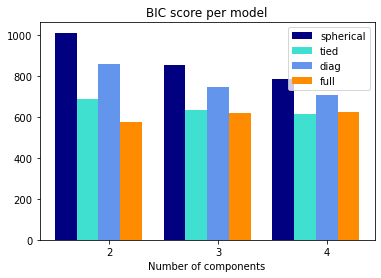

In [16]:
# plot above results
from itertools import product

colors = ['navy', 'turquoise', 'cornflowerblue', 'darkorange']

plt.figure()

bar_array = np.zeros(shape=(len(cv_types), len(n_components_range)), dtype='object')
for i, (cv_type, color) in enumerate(zip(cv_types, colors)):
    for j, n_components in enumerate(n_components_range):
        x_pos = n_components + (0.2 * i) - 0.4
        bar_array[i, j] = plt.bar(x_pos, bic_save[i, j], 
                                  width=0.2, color=color)

plt.xticks(n_components_range)
plt.title('BIC score per model')
plt.xlabel('Number of components')
plt.legend([b[0] for b in bar_array], cv_types)

plt.show()